# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [268]:
from google.colab import files
uploaded = files.upload()

Saving bank_transactions_data.csv to bank_transactions_data (1).csv


In [269]:
data = pd.read_csv("bank_transactions_data.csv")

# Menampilkan 5 baris pertama
display(data.head())

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [270]:
# Ukuran dataset
print(f"Dataset memiliki {data.shape[0]} baris dan {data.shape[1]} kolom.\n")

# Info dataset
print("Informasi dataset:")
data.info()


Dataset memiliki 2512 baris dan 16 kolom.

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts   

In [271]:
# 2. Menangani Data yang Hilang
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [272]:
# 3. Analisis Distribusi dan Korelasi
print("\nDeskripsi Statistik Numerik:")
data.describe()


Deskripsi Statistik Numerik:


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


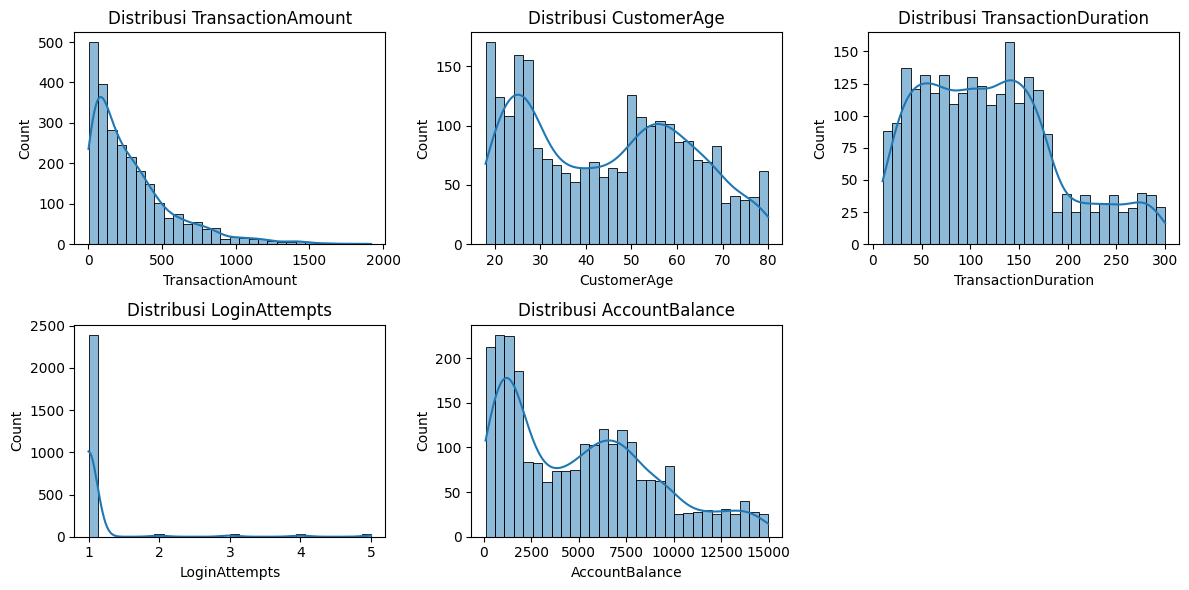

In [273]:
# 4. Analisis Distribusi Variabel Numerik
numeric_cols = data.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols[:6]):  # Ambil 6 fitur pertama untuk contoh
    plt.subplot(2, 3, i+1)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Distribusi {col}")
plt.tight_layout()
plt.show()

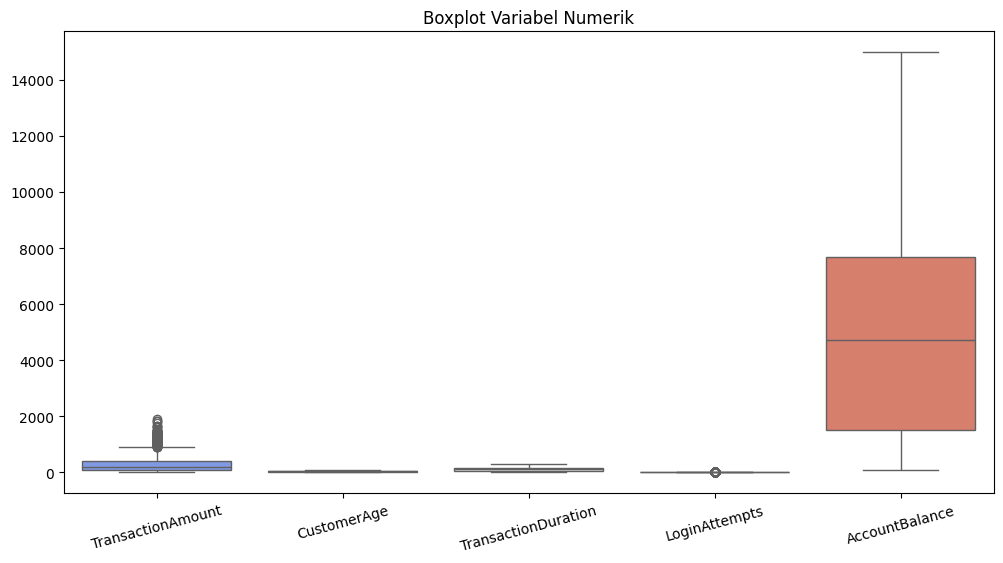

In [274]:
# Definisi ulang kolom numerik
numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']


# Boxplot untuk melihat outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_cols], palette="coolwarm")
plt.title("Boxplot Variabel Numerik")
plt.xticks(rotation=15)
plt.show()

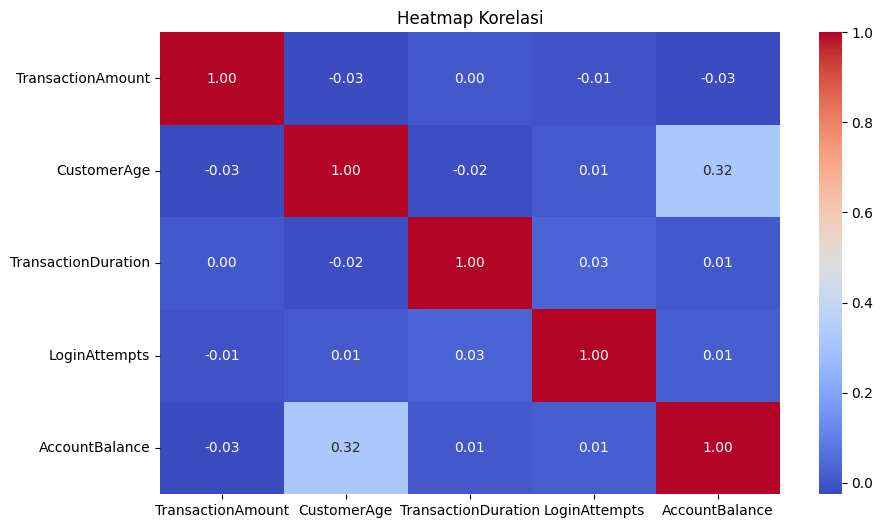

In [275]:
# 5. Korelasi Antar Variabel Numerik
plt.figure(figsize=(10, 6))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi")
plt.show()

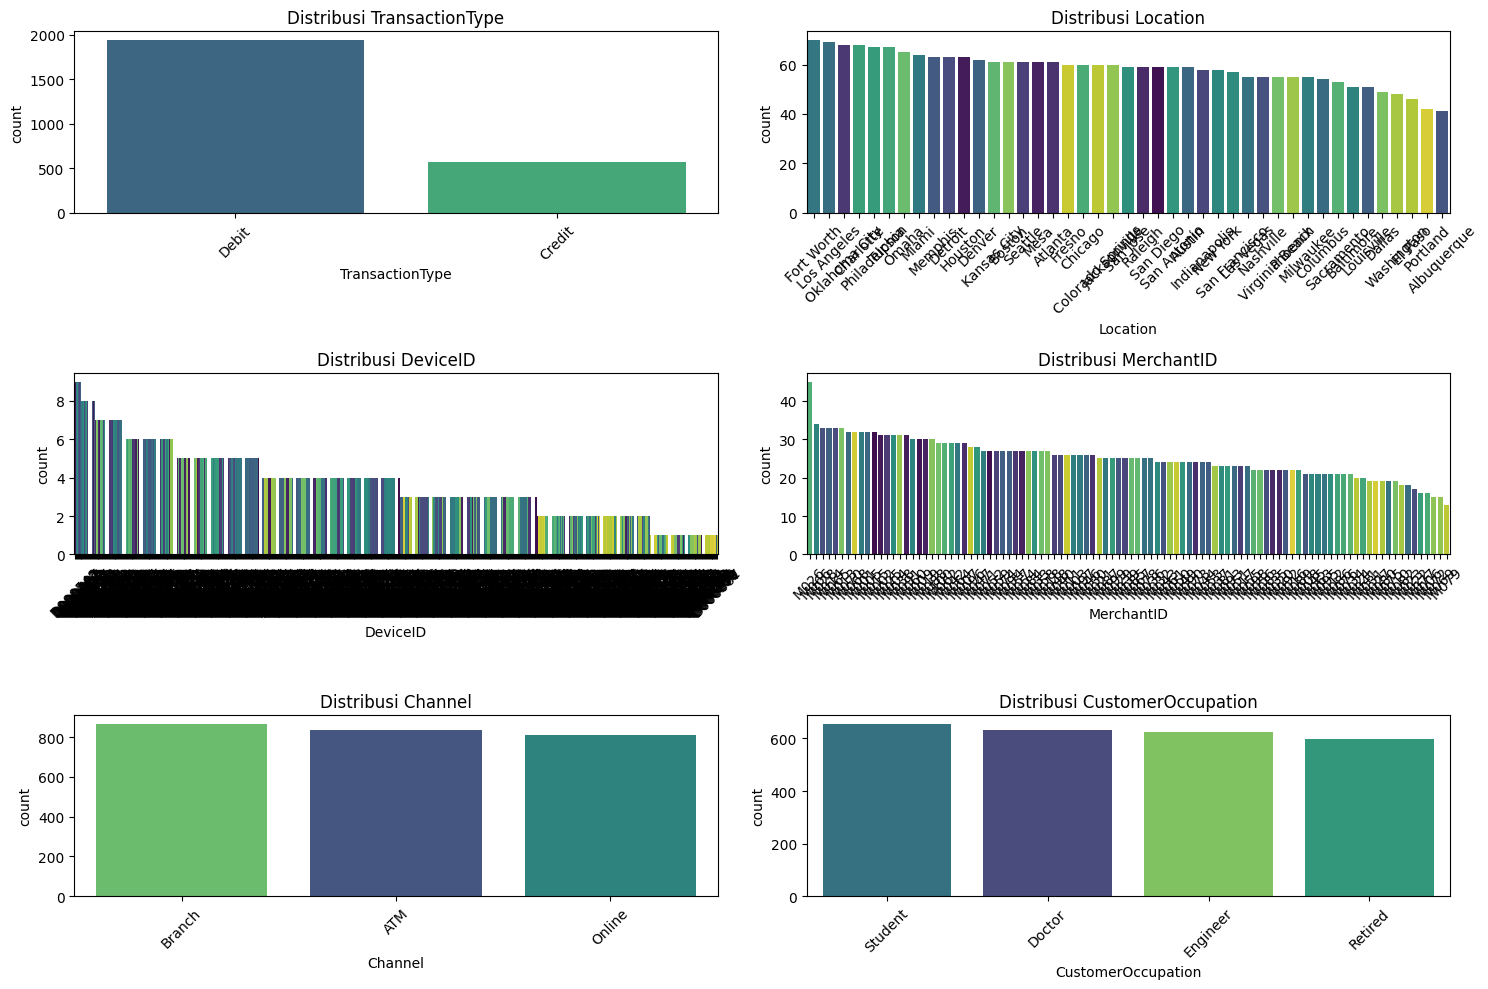

In [276]:
# 5. Visualisasi Variabel Kategorikal
categorical_cols = ['TransactionType', 'Location', 'DeviceID', 'MerchantID', 'Channel', 'CustomerOccupation']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=data, x=col, hue=col, palette="viridis", legend=False, order=data[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

In [277]:
# Mengecek jumlah duplikat
duplikat = data.duplicated().sum()
print(f"Jumlah duplikat: {duplikat}")

Jumlah duplikat: 0


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [278]:
# Encoding categorical features
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']  # Sesuaikan fitur kategorikal
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,1,36,D000380,162.198.218.92,M015,0,70,0,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,1,15,D000051,13.149.61.4,M052,0,68,0,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,1,23,D000235,215.97.143.157,M009,2,19,3,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,1,33,D000187,200.13.225.150,M002,2,26,3,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,0,1,D000308,65.164.3.100,M091,2,26,3,198,1,7429.40,2024-11-04 08:06:39


In [279]:
from sklearn.preprocessing import MinMaxScaler  # Tambahkan ini sebelum penggunaan MinMaxScaler

# Normalisasi atau standarisasi fitur numerik
numerical_cols = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']  # Sesuaikan fitur numerik

# Normalisasi fitur numerik dengan MinMaxScaler
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

data.head()


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,1,36,D000380,162.198.218.92,M015,0,70,0,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,1,15,D000051,13.149.61.4,M052,0,68,0,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,1,23,D000235,215.97.143.157,M009,2,19,3,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,1,33,D000187,200.13.225.150,M002,2,26,3,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,0,1,D000308,65.164.3.100,M091,2,26,3,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [280]:
# Deteksi dan Penanganan Outlier (menggunakan IQR)
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((data[numerical_cols] < lower_bound) | (data[numerical_cols] > upper_bound)).any(axis=1)
df_cleaned = data[~outliers]

df_cleaned.shape

(2282, 16)

In [281]:
print(df_cleaned.isnull().sum())

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [282]:
df_cleaned.loc[:, 'CustomerAge'] = df_cleaned['CustomerAge'].fillna(df_cleaned['CustomerAge'].median())



Distribusi kelompok usia:
AgeGroup
Young          668
Middle-aged    628
Senior         505
Adult          432
Underage        49
Name: count, dtype: int64


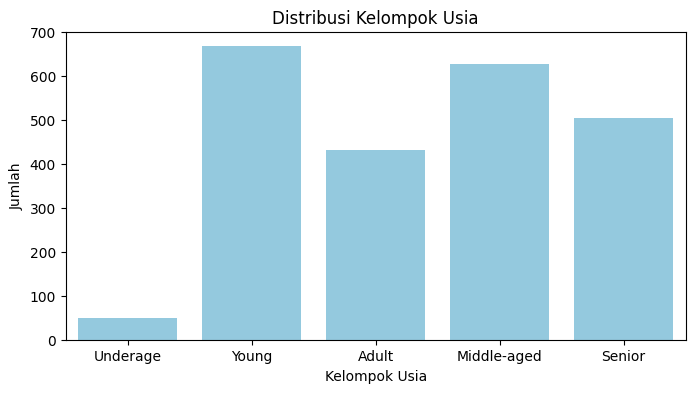

In [283]:
df_cleaned = df_cleaned.copy()  # Buat salinan untuk menghindari masalah referensi
df_cleaned['AgeGroup'] = pd.cut(df_cleaned['CustomerAge'],
                                bins=[0, 18, 30, 45, 60, df_cleaned['CustomerAge'].max()],
                                labels=['Underage', 'Young', 'Adult', 'Middle-aged', 'Senior'])

# Cek distribusi kelompok usia
print("\nDistribusi kelompok usia:")
print(df_cleaned['AgeGroup'].value_counts())

# Visualisasi distribusi kelompok usia
plt.figure(figsize=(8, 4))
sns.countplot(data=df_cleaned, x='AgeGroup', color="skyblue")
plt.title("Distribusi Kelompok Usia")
plt.xlabel("Kelompok Usia")
plt.ylabel("Jumlah")
plt.show()


In [284]:
# Cek kembali apakah masih ada missing value
print(df_cleaned.isnull().sum())

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
AgeGroup                   0
dtype: int64


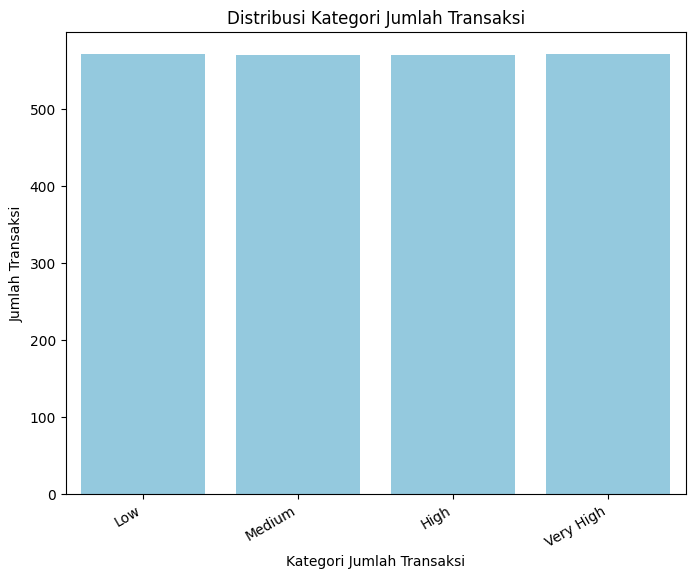

In [285]:
# Binning untuk TransactionAmount
df_cleaned['TransactionCategory'] = pd.qcut(df_cleaned['TransactionAmount'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Visualisasi distribusi kategori jumlah transaksi
plt.figure(figsize=(8,6))
sns.countplot(data=df_cleaned, x='TransactionCategory', color="skyblue")
plt.xticks(rotation=30, ha="right")
plt.xlabel("Kategori Jumlah Transaksi")
plt.ylabel("Jumlah Transaksi")
plt.title("Distribusi Kategori Jumlah Transaksi")
plt.show()

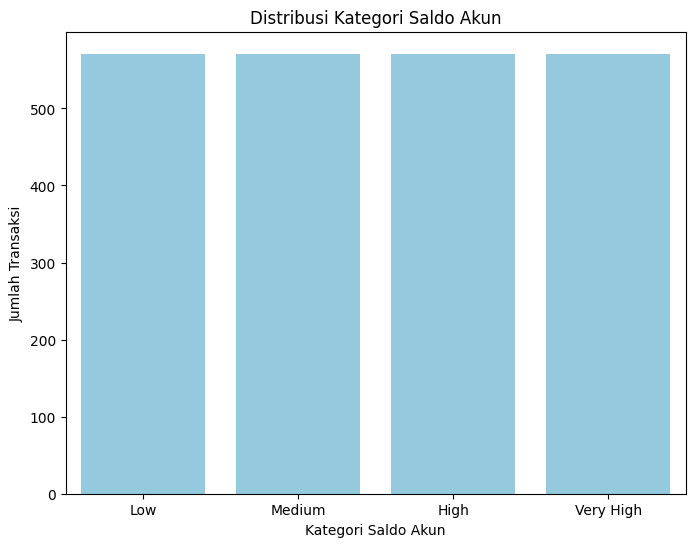

In [286]:
# Binning untuk AccountBalance setelah outlier dihapus
df_cleaned['BalanceCategory'] = pd.qcut(df_cleaned['AccountBalance'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Visualisasi distribusi kategori saldo akun
plt.figure(figsize=(8,6))
sns.countplot(data=df_cleaned, x='BalanceCategory', color="skyblue")
plt.xlabel("Kategori Saldo Akun")
plt.ylabel("Jumlah Transaksi")
plt.title("Distribusi Kategori Saldo Akun")
plt.show()


In [287]:
print(df_cleaned.isnull().sum())

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
AgeGroup                   0
TransactionCategory        0
BalanceCategory            0
dtype: int64


In [288]:
df_cleaned.duplicated().sum()  # Untuk memeriksa duplikasi


np.int64(0)

In [289]:
print(df_cleaned.dtypes)

TransactionID                object
AccountID                    object
TransactionAmount           float64
TransactionDate              object
TransactionType               int64
Location                      int64
DeviceID                     object
IP Address                   object
MerchantID                   object
Channel                       int64
CustomerAge                   int64
CustomerOccupation            int64
TransactionDuration         float64
LoginAttempts               float64
AccountBalance              float64
PreviousTransactionDate      object
AgeGroup                   category
TransactionCategory        category
BalanceCategory            category
dtype: object


In [290]:
# Hapus kolom yang tidak digunakan untuk clustering
df_clustering = df_cleaned.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID',
                                         'TransactionDate', 'PreviousTransactionDate',
                                         'AgeGroup', 'TransactionCategory', 'BalanceCategory'])

df_clustering.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,1,36,0,70,0,0.244828,0.0,0.336832
1,0.195940,1,15,0,68,0,0.451724,0.0,0.918055
2,0.065680,1,23,2,19,3,0.158621,0.0,0.068637
3,0.096016,1,33,2,26,3,0.051724,0.0,0.569198
4,0.006874,0,1,2,26,3,0.648276,0.0,0.492591


In [291]:
# Konversi kategori ke numerik jika masih ada
categorical_cols = df_clustering.select_dtypes(include=['category', 'object']).columns
encoder = LabelEncoder()

for col in categorical_cols:
    df_clustering[col] = encoder.fit_transform(df_clustering[col])


In [293]:
# Normalisasi fitur numerik dengan MinMaxScaler
numerical_cols = df_clustering.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df_clustering[numerical_cols] = scaler.fit_transform(df_clustering[numerical_cols])

In [294]:
# Cek apakah ada missing values sebelum menyimpan
print(df_clustering.isnull().sum())

TransactionAmount      0
TransactionType        0
Location               0
Channel                0
CustomerAge            0
CustomerOccupation     0
TransactionDuration    0
LoginAttempts          0
AccountBalance         0
dtype: int64


In [295]:
# Simpan dataset yang telah diproses ke dalam file CSV
df_clustering.to_csv("Dataset_clustering.csv", index=False)
df_clustering.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.015317,1.0,0.857143,0.0,0.838710,0.0,0.244828,0.0,0.336832
1,0.416400,1.0,0.357143,0.0,0.806452,0.0,0.451724,0.0,0.918055
2,0.139579,1.0,0.547619,1.0,0.016129,1.0,0.158621,0.0,0.068637
3,0.204047,1.0,0.785714,1.0,0.129032,1.0,0.051724,0.0,0.569198
4,0.014608,0.0,0.023810,1.0,0.129032,1.0,0.648276,0.0,0.492591


In [296]:
# Download file CSV
from google.colab import files
files.download('data_clustering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [345]:
# Load dataset clustering yang sudah disimpan
df_cluster = pd.read_csv("Dataset_clustering.csv")

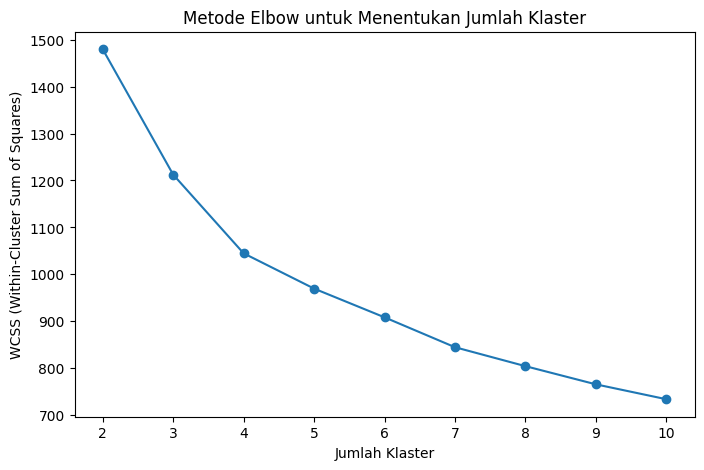

In [346]:
# Uji beberapa jumlah klaster (misal: 2-10)
wcss = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_clustering)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o', linestyle='-')
plt.xlabel('Jumlah Klaster')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster')
plt.show()


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [347]:
# Inisialisasi dan latih model KMeans
optimal_k = 3  # Ganti dengan jumlah optimal dari Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(df_clustering)

# Hitung Silhouette Score
silhouette_avg = silhouette_score(df_clustering, cluster_labels)
print(f'Silhouette Score: {silhouette_avg:.4f}')


Silhouette Score: 0.2404


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [382]:
# # Pilih fitur terbaik berdasarkan Mutual Information Score
# df_clustering_best = df_clustering[['TransactionType', 'CustomerOccupation', 'CustomerAge', 'AccountBalance']].copy()

# # Pastikan fitur kategori diubah ke numerik
encoder = LabelEncoder()
df_clustering_best.loc[:, 'TransactionType'] = encoder.fit_transform(df_clustering_best['TransactionType'])
df_clustering_best.loc[:, 'CustomerOccupation'] = encoder.fit_transform(df_clustering_best['CustomerOccupation'])


In [383]:
# Scaling data sebelum PCA
scaler = StandardScaler()
df_clustering_best_scaled = scaler.fit_transform(df_clustering_best)

In [384]:
# Gunakan jumlah komponen maksimal sesuai dengan jumlah fitur (4 atau kurang)
pca = PCA(n_components=4)  # Bisa 2, 3, atau 4, tapi tidak boleh lebih dari 4
X_pca_full = pca.fit_transform(df_clustering_best_scaled)


In [385]:
# Clustering ulang dengan jumlah cluster terbaik
# optimal_clusters = 5  # Sesuaikan dengan hasil terbaik dari looping di atas
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels_pca_best = kmeans.fit_predict(X_pca_best)

# Evaluasi Silhouette Score
silhouette_pca_best = silhouette_score(X_pca_best, cluster_labels_pca_best)
print(f"Silhouette Score setelah PCA: {silhouette_pca_best:.4f}")


Silhouette Score setelah PCA: 0.7522


In [330]:
# # # Pilih hanya fitur terbaik dari Mutual Information Score
# # df_clustering_best = df_clustering[['TransactionType', 'CustomerOccupation']]

# # PCA ulang
# pca = PCA(n_components=2)  # Pastikan hanya 2 komponen untuk visualisasi
# X_pca_best = pca.fit_transform(df_clustering_best_scaled)

# # Clustering ulang
# kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
# cluster_labels_pca_best = kmeans.fit_predict(X_pca_best)

# # Evaluasi ulang Silhouette Score
# silhouette_pca_best = silhouette_score(X_pca_best, cluster_labels_pca_best)
# print(f"Silhouette Score setelah PCA dengan fitur terbaik: {silhouette_pca_best:.4f}")

Silhouette Score setelah PCA dengan fitur terbaik: 0.7522


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

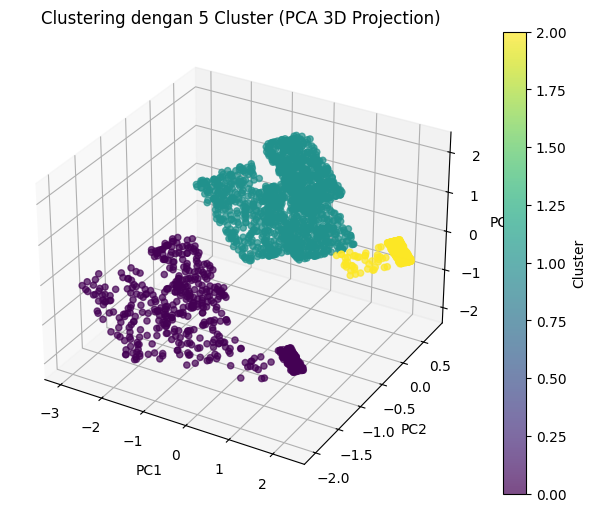

In [386]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
X_pca_3D = pca.fit_transform(df_clustering_best_scaled)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3D[:,0], X_pca_3D[:,1], X_pca_3D[:,2], c=cluster_labels_pca, cmap='viridis', alpha=0.7)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title(f"Clustering dengan {optimal_clusters} Cluster (PCA 3D Projection)")
plt.colorbar(scatter, label="Cluster")
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [424]:
# === 1. Tambahkan Hasil Label Cluster ke DataFrame ===
df_clustering['Cluster'] = cluster_labels_pca_best  # Pastikan cluster_labels_pca_best sudah ada


In [425]:
# === 2. Lakukan Inverse Transform pada Fitur Kategorikal ===
encoder_transaction = LabelEncoder()
encoder_occupation = LabelEncoder()

In [426]:
# Pastikan encoder sudah fit sebelum inverse transform
df_clustering['TransactionType'] = encoder_transaction.fit_transform(df_clustering['TransactionType'])
df_clustering['CustomerOccupation'] = encoder_occupation.fit_transform(df_clustering['CustomerOccupation'])

df_clustering['TransactionType'] = encoder_transaction.inverse_transform(df_clustering['TransactionType'].astype(int))
df_clustering['CustomerOccupation'] = encoder_occupation.inverse_transform(df_clustering['CustomerOccupation'].astype(int))

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [431]:
# === 3. Lakukan Inverse Transform pada Fitur yang Dinormalisasi ===
numerical_features = ['TransactionAmount', 'CustomerAge', 'AccountBalance']  # Sesuaikan dengan dataset
scaler = MinMaxScaler()

df_clustering[numerical_features] = scaler.fit_transform(df_clustering[numerical_features])
df_clustering[numerical_features] = scaler.inverse_transform(df_clustering[numerical_features])  # Kembalikan ke skala asli

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [432]:

# === 4. Analisis Karakteristik Cluster ===
print("=== ANALISIS KARAKTERISTIK CLUSTER ===")
cluster_summary = df_clustering.groupby('Cluster')[['TransactionAmount', 'CustomerAge', 'AccountBalance']].mean()
print(cluster_summary)



=== ANALISIS KARAKTERISTIK CLUSTER ===
         TransactionAmount  CustomerAge  AccountBalance
Cluster                                                
0                 0.274337     0.571502        0.334875
1                 0.315518     0.436522        0.197598
2                 0.273528     0.504868        0.584859
3                 0.288202     0.461011        0.498415
4                 0.285166     0.082644        0.098337


In [433]:
# === 5. Interpretasi Hasil Clustering ===
print("\n=== INTERPRETASI HASIL CLUSTER ===")

for cluster_id in sorted(df_clustering['Cluster'].unique()):
    avg_transaction = cluster_summary.loc[cluster_id, 'TransactionAmount']
    avg_age = cluster_summary.loc[cluster_id, 'CustomerAge']
    avg_balance = cluster_summary.loc[cluster_id, 'AccountBalance']

    print(f"\nCluster {cluster_id}:")
    print(f"- Rata-rata Jumlah Transaksi: {avg_transaction:.2f}")
    print(f"- Rata-rata Usia Pelanggan: {avg_age:.2f}")
    print(f"- Rata-rata Saldo Akun: {avg_balance:.2f}")

    if avg_balance > 5000000 and avg_transaction > 500000:
        print("  🔹 Cluster ini berisi pelanggan dengan saldo besar dan transaksi tinggi. Bisa menjadi target premium.")
    elif avg_balance < 2000000 and avg_transaction < 200000:
        print("  🔹 Cluster ini berisi pelanggan dengan saldo rendah dan transaksi kecil. Bisa menjadi target program promosi.")
    else:
        print("  🔹 Cluster ini memiliki pelanggan dengan profil menengah.")


=== INTERPRETASI HASIL CLUSTER ===

Cluster 0:
- Rata-rata Jumlah Transaksi: 0.27
- Rata-rata Usia Pelanggan: 0.57
- Rata-rata Saldo Akun: 0.33
  🔹 Cluster ini berisi pelanggan dengan saldo rendah dan transaksi kecil. Bisa menjadi target program promosi.

Cluster 1:
- Rata-rata Jumlah Transaksi: 0.32
- Rata-rata Usia Pelanggan: 0.44
- Rata-rata Saldo Akun: 0.20
  🔹 Cluster ini berisi pelanggan dengan saldo rendah dan transaksi kecil. Bisa menjadi target program promosi.

Cluster 2:
- Rata-rata Jumlah Transaksi: 0.27
- Rata-rata Usia Pelanggan: 0.50
- Rata-rata Saldo Akun: 0.58
  🔹 Cluster ini berisi pelanggan dengan saldo rendah dan transaksi kecil. Bisa menjadi target program promosi.

Cluster 3:
- Rata-rata Jumlah Transaksi: 0.29
- Rata-rata Usia Pelanggan: 0.46
- Rata-rata Saldo Akun: 0.50
  🔹 Cluster ini berisi pelanggan dengan saldo rendah dan transaksi kecil. Bisa menjadi target program promosi.

Cluster 4:
- Rata-rata Jumlah Transaksi: 0.29
- Rata-rata Usia Pelanggan: 0.08
- Ra

clutster 1:
cluster 2:
cluster 3:

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [435]:
# Simpan hasil clustering ke dalam file CSV
df_clustering.to_csv("Dataset_inisiasi.csv", index=False)

df_clustering.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster
0,0.015317,1,0.857143,0.0,0.838710,0,0.244828,0.0,0.336832,2
1,0.416400,1,0.357143,0.0,0.806452,0,0.451724,0.0,0.918055,2
2,0.139579,1,0.547619,1.0,0.016129,3,0.158621,0.0,0.068637,4
3,0.204047,1,0.785714,1.0,0.129032,3,0.051724,0.0,0.569198,4
4,0.014608,0,0.023810,1.0,0.129032,3,0.648276,0.0,0.492591,1


In [436]:
# Untuk Google Colab, gunakan kode ini agar bisa mengunduh file:
from google.colab import files
files.download("Dataset_inisiasi.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>